In [1]:
import os
import tarfile 
from six.moves import urllib

#constants
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

#method to download the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data(HOUSING_URL, HOUSING_PATH)


In [2]:
import pandas as pd

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


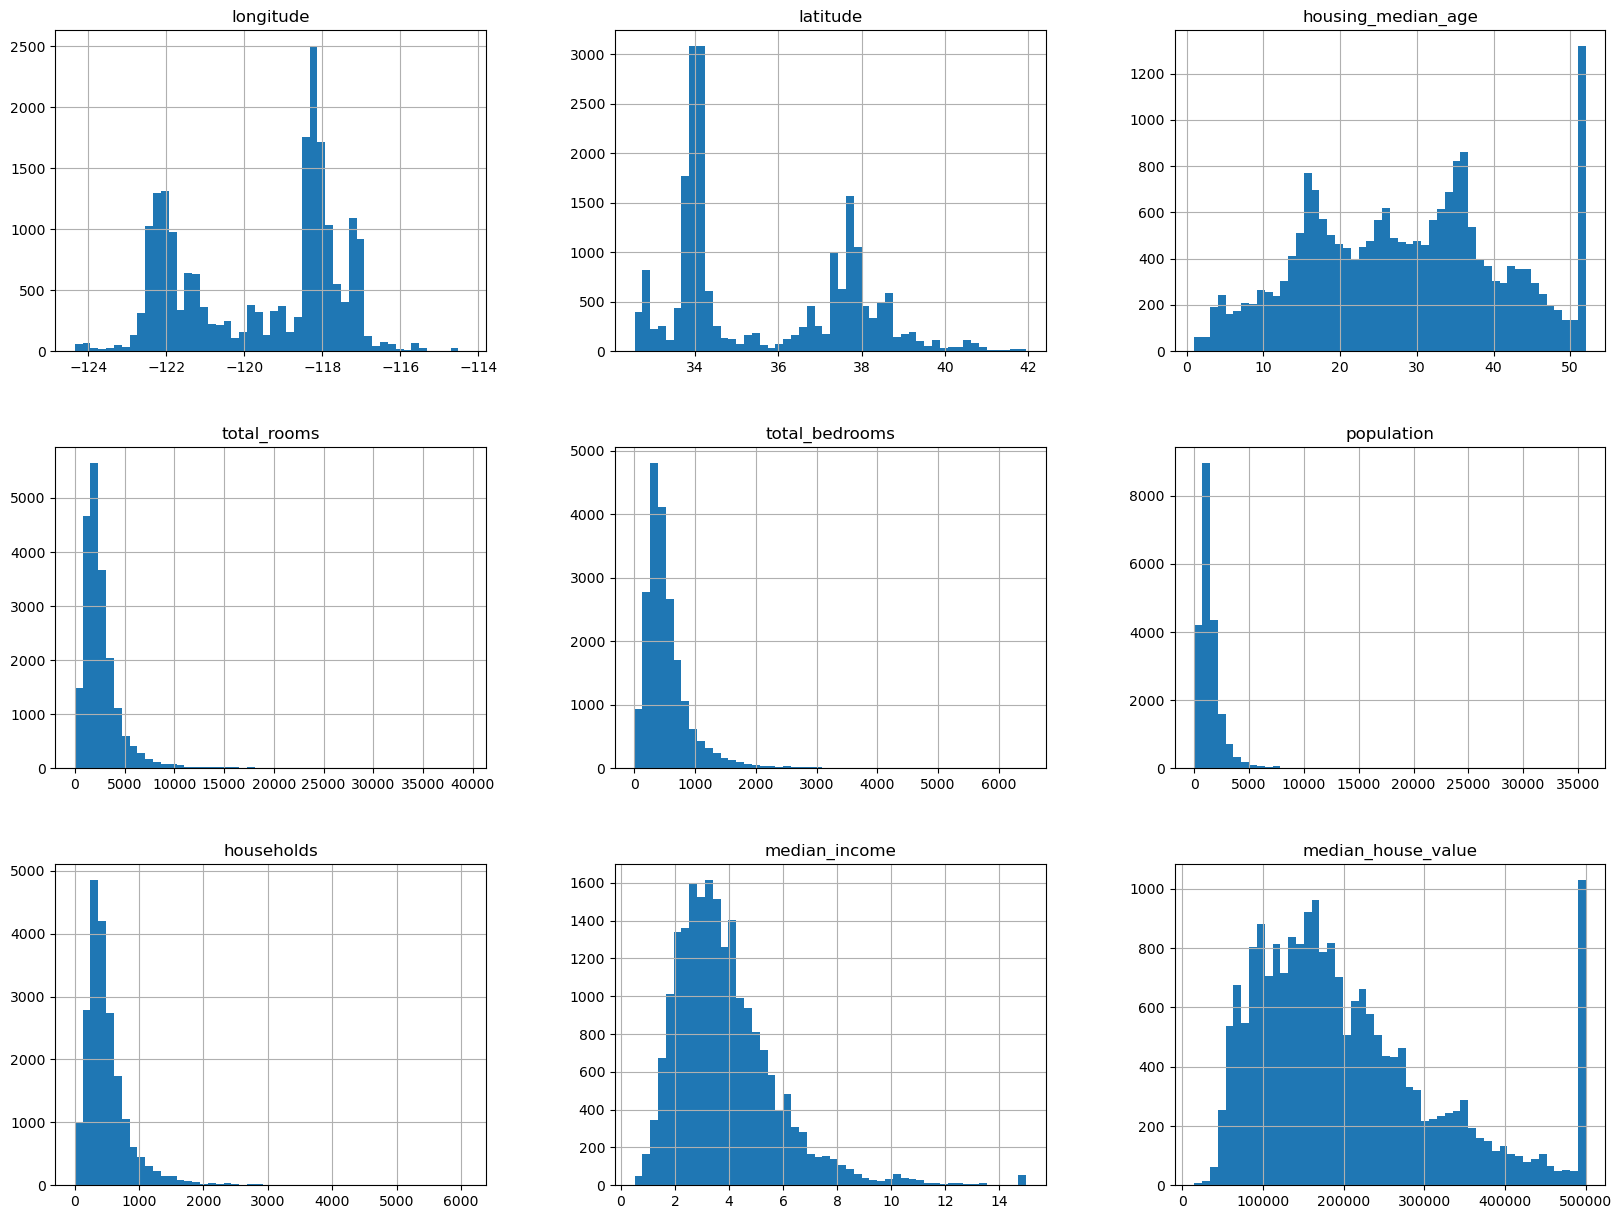

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)


16512

In [12]:
len(test_set)

4128

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
housing['income_cat'] = np.ceil(housing['median_income'])
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

<AxesSubplot:>

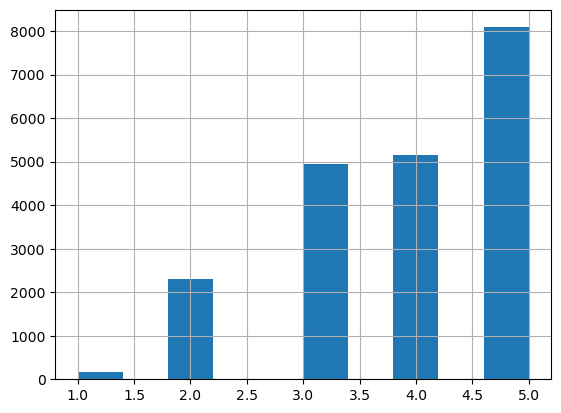

In [16]:
housing['income_cat'].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# looking the income category proportions in the test set

In [19]:
strat_test_set[['income_cat']].value_counts() / len(strat_test_set)


income_cat
5.0           0.391715
4.0           0.249516
3.0           0.239583
2.0           0.111434
1.0           0.007752
dtype: float64

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [21]:
housing = strat_train_set.copy()

In [22]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17275,-119.69,34.38,39.0,1383.0,459.0,677.0,362.0,2.2500,281300.0,NEAR OCEAN
6402,-118.02,34.14,34.0,1077.0,257.0,478.0,199.0,2.6316,252800.0,INLAND
9468,-123.80,39.44,33.0,2024.0,459.0,1019.0,422.0,1.9208,93600.0,<1H OCEAN
20449,-118.88,34.28,22.0,3369.0,771.0,2751.0,710.0,4.0474,182100.0,<1H OCEAN
3206,-119.64,36.35,30.0,1765.0,310.0,746.0,298.0,2.8125,70200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
10501,-117.70,33.47,20.0,1577.0,363.0,764.0,333.0,4.1563,320800.0,<1H OCEAN
10422,-117.60,33.41,29.0,2193.0,389.0,922.0,387.0,4.5476,309200.0,NEAR OCEAN
1848,-122.27,37.91,47.0,1930.0,315.0,692.0,296.0,6.3669,315500.0,NEAR BAY
4271,-118.33,34.10,45.0,1913.0,696.0,1552.0,611.0,2.0888,237500.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

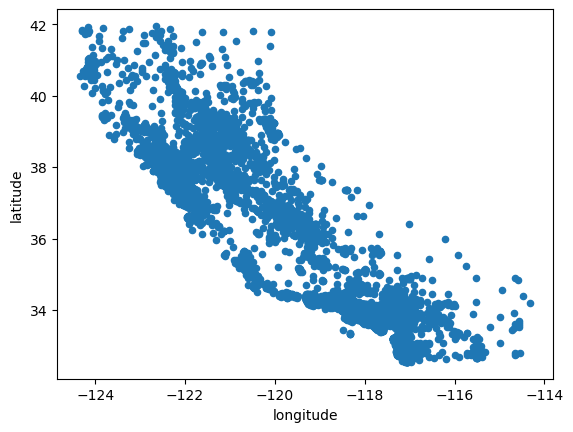

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude')


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

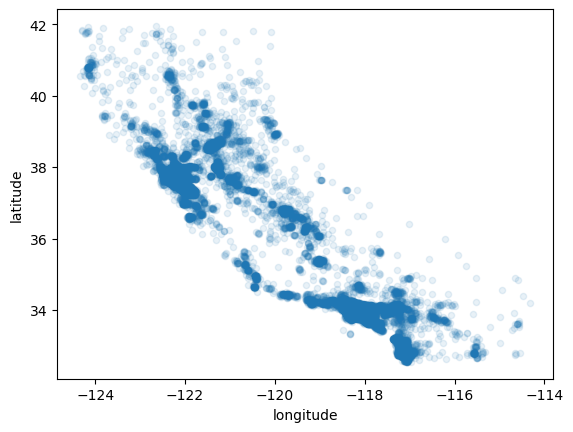

In [24]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

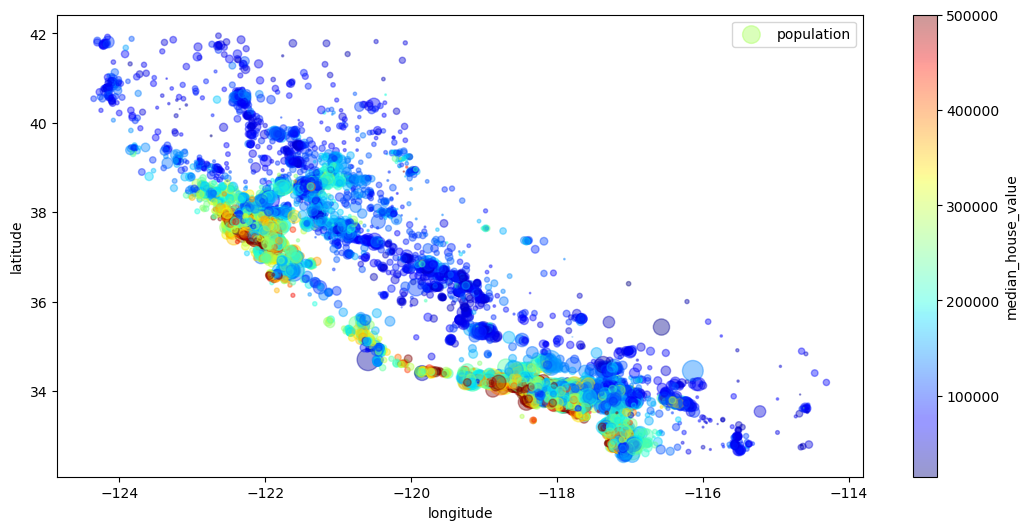

In [25]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/50, label='population', figsize=(13,6),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

<AxesSubplot:xlabel='median_house_value', ylabel='ocean_proximity'>

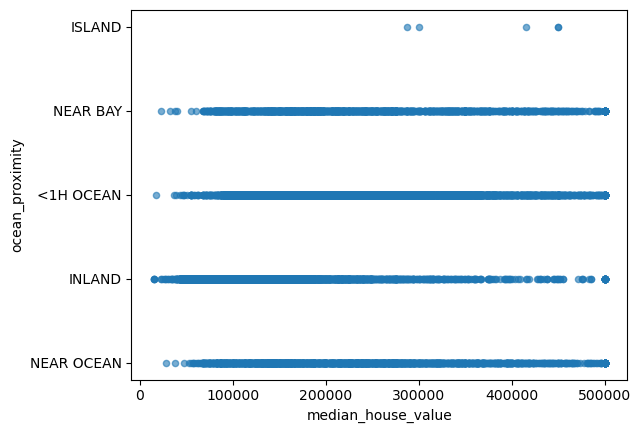

In [26]:
housing.plot(kind='scatter', x='median_house_value', y='ocean_proximity', alpha=0.6)



In [27]:
housing[['ocean_proximity', 'median_house_value']].sort_values(by='median_house_value',ascending=False)


,ocean_proximity,median_house_value
16121,NEAR BAY,500001.0
10794,<1H OCEAN,500001.0
9032,NEAR OCEAN,500001.0
17153,NEAR OCEAN,500001.0
3486,<1H OCEAN,500001.0
...,...,...
5887,<1H OCEAN,17500.0
9188,INLAND,14999.0
2521,INLAND,14999.0
19802,INLAND,14999.0


In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923739,-0.114735,0.049610,0.074351,0.103926,0.059255,-0.007877,-0.043065
latitude,-0.923739,1.000000,0.016007,-0.043213,-0.072590,-0.115159,-0.076920,-0.087906,-0.147961
housing_median_age,-0.114735,0.016007,1.000000,-0.359608,-0.318819,-0.298825,-0.300602,-0.118628,0.101851
total_rooms,0.049610,-0.043213,-0.359608,1.000000,0.929975,0.861652,0.917069,0.202587,0.141468
total_bedrooms,0.074351,-0.072590,-0.318819,0.929975,1.000000,0.884200,0.978988,-0.005138,0.054276
population,0.103926,-0.115159,-0.298825,0.861652,0.884200,1.000000,0.914000,0.009393,-0.020020
households,0.059255,-0.076920,-0.300602,0.917069,0.978988,0.914000,1.000000,0.016344,0.071419
median_income,-0.007877,-0.087906,-0.118628,0.202587,-0.005138,0.009393,0.016344,1.000000,0.690163
median_house_value,-0.043065,-0.147961,0.101851,0.141468,0.054276,-0.020020,0.071419,0.690163,1.000000


In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.690163
total_rooms           0.141468
housing_median_age    0.101851
households            0.071419
total_bedrooms        0.054276
population           -0.020020
longitude            -0.043065
latitude             -0.147961
Name: median_house_value, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

In [32]:
attributes = ['median_house_value', 'median_income', 'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>]],
      dtype=object)

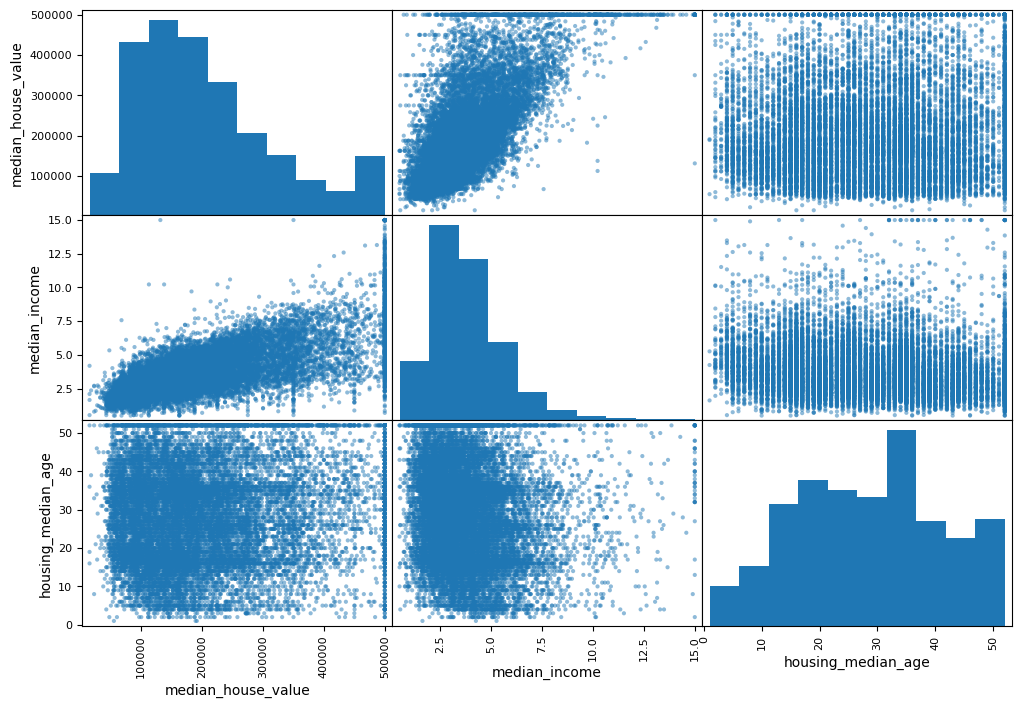

In [33]:
scatter_matrix(housing[attributes], figsize=(12,8))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

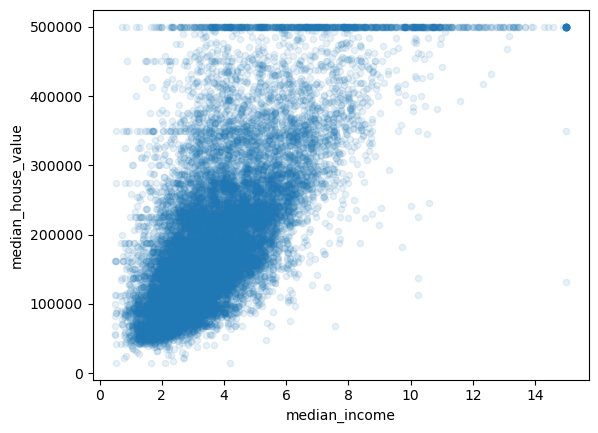

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17275,-119.69,34.38,39.0,1383.0,459.0,677.0,362.0,2.2500,281300.0,NEAR OCEAN
6402,-118.02,34.14,34.0,1077.0,257.0,478.0,199.0,2.6316,252800.0,INLAND
9468,-123.80,39.44,33.0,2024.0,459.0,1019.0,422.0,1.9208,93600.0,<1H OCEAN
20449,-118.88,34.28,22.0,3369.0,771.0,2751.0,710.0,4.0474,182100.0,<1H OCEAN
3206,-119.64,36.35,30.0,1765.0,310.0,746.0,298.0,2.8125,70200.0,INLAND


In [36]:
housing['rooms_per_households'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing["population"] / housing['households']

In [37]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690163
rooms_per_households        0.150634
total_rooms                 0.141468
housing_median_age          0.101851
households                  0.071419
total_bedrooms              0.054276
population                 -0.020020
population_per_household   -0.022300
longitude                  -0.043065
latitude                   -0.147961
bedrooms_per_room          -0.257976
Name: median_house_value, dtype: float64

In [38]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# Data cleaning

In [39]:
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17275,-119.69,34.38,39.0,1383.0,459.0,677.0,362.0,2.2500,NEAR OCEAN
6402,-118.02,34.14,34.0,1077.0,257.0,478.0,199.0,2.6316,INLAND
9468,-123.80,39.44,33.0,2024.0,459.0,1019.0,422.0,1.9208,<1H OCEAN
20449,-118.88,34.28,22.0,3369.0,771.0,2751.0,710.0,4.0474,<1H OCEAN
3206,-119.64,36.35,30.0,1765.0,310.0,746.0,298.0,2.8125,INLAND
...,...,...,...,...,...,...,...,...,...
10501,-117.70,33.47,20.0,1577.0,363.0,764.0,333.0,4.1563,<1H OCEAN
10422,-117.60,33.41,29.0,2193.0,389.0,922.0,387.0,4.5476,NEAR OCEAN
1848,-122.27,37.91,47.0,1930.0,315.0,692.0,296.0,6.3669,NEAR BAY
4271,-118.33,34.10,45.0,1913.0,696.0,1552.0,611.0,2.0888,<1H OCEAN


# To replace a na value with its median of the attribute

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
imputer = SimpleImputer(strategy='median')

In [42]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [43]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([-118.53  ,   34.27  ,   29.    , 2118.    ,  432.    , 1158.    ,
        407.    ,    3.5403])

In [45]:
X=imputer.transform(housing_num)

In [46]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [47]:
housing_cat = housing[['ocean_proximity']]

In [48]:
housing_cat.head()

,ocean_proximity
17275,NEAR OCEAN
6402,INLAND
9468,<1H OCEAN
20449,<1H OCEAN
3206,INLAND


# convert from text to number

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
ordinal_encoder = OrdinalEncoder()

In [51]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [3.],
       [1.],
       [3.],
       [0.]])

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# to make the categories from 1 - 4 to 0 and 1

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
cat_encoder = OneHotEncoder()

In [55]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [56]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [57]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [58]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# to automate the creation of an attribute

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

In [60]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [61]:
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# transform pipeline to help executing data in the right order

In [62]:
from sklearn.pipeline import Pipeline


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [65]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [66]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [67]:
housing_prepared = full_pipeline.fit_transform(housing)

# training and evaluating on the training set

In [68]:
from sklearn.svm import SVR

In [69]:
svr_reg = SVR(kernel='linear')

In [70]:
svr_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [71]:
housing_predictions = svr_reg.predict(housing_prepared)

In [72]:
print("predictions: ", svr_reg.predict(housing_prepared))

predictions:  [168864.47749361 168517.41949556 170731.76185774 ... 193045.85820681
 169854.07831762 160460.17926803]


In [73]:

print('labels:', list(housing_labels))

labels: [281300.0, 252800.0, 93600.0, 182100.0, 70200.0, 500001.0, 240000.0, 61900.0, 349100.0, 305800.0, 171400.0, 42500.0, 147000.0, 93200.0, 141000.0, 273200.0, 224200.0, 295900.0, 162500.0, 97500.0, 190500.0, 446800.0, 118800.0, 209500.0, 143600.0, 138200.0, 234400.0, 500001.0, 70700.0, 255500.0, 213000.0, 211300.0, 157600.0, 124100.0, 120800.0, 109700.0, 308900.0, 151500.0, 160700.0, 200000.0, 500001.0, 271300.0, 184900.0, 261400.0, 500001.0, 48000.0, 432100.0, 102600.0, 250700.0, 91400.0, 382200.0, 129100.0, 387300.0, 92500.0, 191000.0, 434800.0, 156300.0, 126000.0, 247400.0, 145800.0, 119300.0, 92700.0, 65900.0, 69800.0, 227400.0, 130400.0, 270900.0, 185700.0, 229200.0, 366700.0, 154400.0, 259800.0, 106300.0, 395300.0, 144600.0, 116900.0, 230900.0, 278100.0, 253400.0, 336100.0, 164000.0, 367600.0, 64500.0, 251100.0, 73500.0, 327500.0, 206300.0, 187500.0, 128600.0, 500001.0, 222000.0, 287800.0, 165600.0, 260000.0, 196800.0, 237500.0, 140600.0, 272600.0, 319100.0, 423100.0, 241400

# Let's measure the error and to find the prediction error

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
housing_predictions = svr_reg.predict(housing_prepared)

In [76]:
svr_mse = mean_squared_error(housing_labels, housing_predictions)

In [77]:
svr_rmse = np.sqrt(svr_mse)

In [78]:
svr_rmse

110832.02839128528

## K-Fold cross Validation randomly splits the training set into n distinct

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-scores)

In [85]:
def display_scores(scores):
    print('scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
display_scores(svr_rmse_scores)

scores: [112143.22278178 110335.30822829 112364.54397118 109850.47961175
 112515.77748129 111043.29195331 108151.76604578 113517.63489604
 111909.97669233 113557.91376576]
Mean: 111538.99154275055
Standard Deviation: 1617.0463854906152


## Fine-tune my model

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
param_rand = [
    {'n_estimators' : [3,10,30], 'max_features' :[2,4,6,8,]},
    {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features':[2,3,4]},
]

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
forest_reg = RandomForestRegressor()

In [97]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [98]:
forest_reg.predict(housing_prepared)

array([278031.01, 229763.  , 101665.  , ..., 332600.02, 239511.  ,
       164687.  ])

In [100]:
housing_predictions = forest_reg.predict(housing_prepared)

In [101]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)

In [102]:
forest_rmse = np.sqrt(forest_mse)

In [113]:
forest_rmse

18574.83041143393

In [106]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring='neg_mean_squared_error', cv=10)

In [111]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [112]:
display_scores(forest_rmse_scores)

scores: [48536.08631273 48454.37757862 50676.21626772 47672.68546583
 51825.80381833 50406.75639361 48428.27942666 49477.03149639
 51681.27586717 50842.35434196]
Mean: 49800.0866969012
Standard Deviation: 1406.5938073778095


In [103]:
forest_rmse

18574.83041143393

In [104]:
rand_search = RandomizedSearchCV(forest_reg, param_rand, cv=5,
                                scoring = 'neg_mean_squared_error',
                                return_train_score=True)

In [105]:
rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')